<a href="https://colab.research.google.com/github/chamikasudusinghe/nocml/blob/master/fft_r6-unbal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module Imports for Data Fetiching and Visualization



In [0]:
import time
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

Module Imports for Data Processing

In [0]:
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.manifold import TSNE

Importing Dataset from GitHub

Train Data

In [315]:
df = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r6/2-fft-normal-n-0-3-r6.csv?token=AKVFSOEYPQZGFT3QF7E2KVC6ZLO2S')
print(df.shape)
df

(38877, 30)


,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
0,76,4,2,4,1,1,5,17,23,7,0,0,1,4,1,0.25,8,5,1,5,5,25,8,4,4,4,20,85,100,1
1,77,4,2,4,2,2,5,17,23,7,0,0,1,4,1,0.25,9,4,2,5,8,40,8,8,16,16,20,85,100,1
2,78,4,2,4,3,2,5,17,23,7,0,0,1,4,1,0.25,10,3,3,5,9,45,8,12,24,24,20,85,100,1
3,79,4,2,4,4,2,5,17,23,7,0,0,1,4,1,0.25,11,2,4,5,8,40,8,16,32,32,20,85,100,1
4,83,4,2,4,5,3,5,17,23,7,0,0,1,4,1,0.25,15,1,5,5,5,25,8,20,60,60,20,85,100,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38872,3269000,2,0,6,4,2,3,10,22,6,23,7,20044,1,0,0.00,25,5,1,5,5,25,0,24,48,962112,18,30,54,1
38873,3269007,2,0,6,5,3,3,10,22,6,23,7,20044,1,0,0.00,32,4,2,5,8,40,0,30,90,1803960,18,30,54,1
38874,3269008,2,0,2,1,4,3,11,22,6,23,7,20045,1,0,0.00,32,3,3,5,9,45,0,2,8,160360,6,33,18,1
38875,3269009,2,0,7,1,4,3,12,22,6,3,3,20044,2,0,0.00,5,2,4,5,8,40,0,7,28,561232,21,36,63,1


In [0]:
df1 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r6/2-fft-malicious-n-0-3-m-1-r6.csv?token=AKVFSOGUVXSQD3RW67DO7JK6ZLO4Q')
df2 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r6/2-fft-malicious-n-0-3-m-6-r6.csv?token=AKVFSOCNJPVM62UN52A3CCK6ZLO4U')
df3 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r6/2-fft-malicious-n-0-3-m-9-r6.csv?token=AKVFSOG6YPAXNT62ITHNSUS6ZLO4W')
df4 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r6/2-fft-malicious-n-0-3-m-14-r6.csv?token=AKVFSOB4DMRQCFJ3SWJ3KOS6ZLO42')

df11 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r6/2-fft-normal-n-0-5-r6.csv?token=AKVFSOB5FCGMVXNHSGPNUV26ZLO7S')
df12 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r6/2-fft-normal-n-0-12-r6.csv?token=AKVFSOAHW574B3VV6T7RF2C6ZLO7W')
df13 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r6/2-fft-normal-n-0-15-r6.csv?token=AKVFSOBYBIUVIEVX57BHHBC6ZLO7Y')

In [317]:
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)
print(df11.shape)
print(df12.shape)
print(df13.shape)

(56906, 30)
(107118, 30)
(55261, 30)
(65864, 30)
(46730, 30)
(34261, 30)
(37247, 30)


In [0]:
df = df.append(df1, ignore_index=True,sort=False)
df = df.append(df2, ignore_index=True,sort=False)
df = df.append(df3, ignore_index=True,sort=False)
df = df.append(df4, ignore_index=True,sort=False)
df = df.append(df11, ignore_index=True,sort=False)
df = df.append(df12, ignore_index=True,sort=False)
df = df.append(df13, ignore_index=True,sort=False)
df = df.sort_values('timestamp')
df.to_csv('fft-r1-train.csv',index=False)

In [319]:
df = pd.read_csv('fft-r1-train.csv')
df

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
0,7,2,0,1,1,4,3,9,6,6,23,7,3,1,0,0.0,4,8,1,8,8,64,0,1,4,12,3,27,9,0
1,11,2,4,1,1,4,3,9,5,5,23,7,2,2,1,0.5,8,11,1,11,11,121,8,1,4,8,3,27,9,1
2,58,4,2,4,1,1,5,17,23,7,5,5,2,2,1,0.5,8,10,2,11,20,220,8,4,4,8,20,85,100,1
3,59,4,2,4,2,2,5,17,23,7,5,5,2,2,1,0.5,9,9,3,11,27,297,8,8,16,32,20,85,100,1
4,60,4,2,4,3,2,5,17,23,7,5,5,2,2,1,0.5,10,8,4,11,32,352,8,12,24,48,20,85,100,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442259,3275492,2,0,6,4,2,3,10,22,6,23,7,20059,1,0,0.0,25,2,10,11,20,220,0,24,48,962832,18,30,54,1
442260,3275499,2,0,6,5,3,3,10,22,6,23,7,20059,1,0,0.0,32,1,11,11,11,121,0,30,90,1805310,18,30,54,1
442261,3275500,2,0,2,1,4,3,11,22,6,23,7,20060,1,0,0.0,32,3,1,3,3,9,0,2,8,160480,6,33,18,1
442262,3275501,2,0,7,1,4,3,12,22,6,15,15,20059,3,0,0.0,5,2,2,3,4,12,0,7,28,561652,21,36,63,1


In [320]:
df.shape

(442264, 30)

Test Data

In [321]:
df5 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r6/2-fft-malicious-n-0-3-m-2-r6.csv?token=AKVFSOAUVUBNU2XCAYJIWMS6ZLPDY')
df6 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r6/2-fft-malicious-n-0-3-m-5-r6.csv?token=AKVFSOHHTIKBLSIHVFIGDSS6ZLPDI')
df7 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r6/2-fft-malicious-n-0-3-m-10-r6.csv?token=AKVFSODJ3KAFEQPUSTDTTXK6ZLPDM')
df8 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r6/2-fft-malicious-n-0-3-m-12-r6.csv?token=AKVFSOFBZO3AFQ5LDZFQKAC6ZLPEQ')
df9 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r6/2-fft-malicious-n-0-3-m-13-r6.csv?token=AKVFSOAGYCH3X2COODWWXR26ZLPEU')
df10 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r6/2-fft-malicious-n-0-3-m-15-r6.csv?token=AKVFSOHCJYMJM22YUK6GM626ZLPEY')

df14 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r6/2-fft-normal-n-0-10-r6.csv?token=AKVFSOF5CRLBIYVPMHBJEKS6ZLPJE')
df5.shape

(80533, 30)

In [322]:
df5

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
0,76,3,2,4,1,1,5,17,23,7,2,2,2,2,1,0.5,8,7,1,7,7,49,6,4,4,8,20,85,100,0
1,77,3,2,4,2,2,5,17,23,7,2,2,2,2,1,0.5,9,6,2,7,12,84,6,8,16,32,20,85,100,0
2,78,3,2,4,3,2,5,17,23,7,2,2,2,2,1,0.5,10,5,3,7,15,105,6,12,24,48,20,85,100,0
3,79,3,2,4,4,2,5,17,23,7,2,2,2,2,1,0.5,11,4,4,7,16,112,6,16,32,64,20,85,100,0
4,83,3,2,4,5,3,5,17,23,7,2,2,2,2,1,0.5,15,3,5,7,15,105,6,20,60,120,20,85,100,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80528,3270516,2,0,6,4,2,3,10,22,6,23,7,30067,1,0,0.0,25,5,3,7,15,105,0,24,48,1443216,18,30,54,0
80529,3270523,2,0,6,5,3,3,10,22,6,23,7,30067,1,0,0.0,32,4,4,7,16,112,0,30,90,2706030,18,30,54,0
80530,3270524,2,0,2,1,4,3,11,22,6,23,7,30068,1,0,0.0,32,3,5,7,15,105,0,2,8,240544,6,33,18,0
80531,3270525,2,0,7,1,4,3,12,22,6,3,3,30067,2,0,0.0,5,2,6,7,12,84,0,7,28,841876,21,36,63,0


In [323]:
df.isnull().sum()

timestamp                     0
outport                       0
inport                        0
cache_coherence_type          0
flit_id                       0
flit_type                     0
vnet                          0
vc                            0
src_ni                        0
src_router                    0
dst_ni                        0
dst_router                    0
traversal_id                  0
hop_count                     0
current_hop                   0
hop_percentage                0
enqueue_time                  0
packet_count_decr             0
packet_count_incr             0
max_packet_count              0
packet_count_index            0
packet_max_index              0
port_index                    0
cache_coherence_flit_index    0
flit_index                    0
traversal_index               0
cache_coherence_vnet_index    0
vnet_vc_index                 0
vnet_vc_cc_index              0
target                        0
dtype: int64

In [0]:
df = df.drop(columns=['timestamp','src_ni','src_router','dst_ni','dst_router'])

In [325]:
df.corr()

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
outport,1.000000,-0.214568,-0.055182,-0.007310,0.011083,0.239002,0.255710,-0.049965,0.216171,-0.479835,-0.659394,-0.343377,-0.094867,0.000310,-0.059727,-0.045382,-0.039152,0.558383,-0.046076,-0.031288,-0.048605,0.140601,0.246765,0.219786,0.139546
inport,-0.214568,1.000000,-0.062112,0.005025,-0.007607,0.107689,0.026973,-0.068714,0.418864,0.553324,0.493590,0.118047,-0.083472,-0.164940,-0.156910,-0.127872,-0.107747,0.612993,-0.015884,-0.017564,-0.049196,0.032356,0.075408,0.083942,0.108503
cache_coherence_type,-0.055182,-0.062112,1.000000,0.263477,-0.398597,-0.232143,-0.249947,0.045601,-0.163127,-0.112805,-0.086949,-0.152613,0.065487,-0.031747,0.021312,0.024894,0.026047,-0.100389,0.500468,0.402899,0.304646,0.650979,-0.240292,0.169917,-0.003724
flit_id,-0.007310,0.005025,0.263477,1.000000,-0.022173,0.211686,0.192635,0.008412,0.057553,0.018226,-0.021175,0.376653,-0.041076,0.078362,0.023552,0.022827,0.013639,-0.010728,0.945500,0.905458,0.640574,0.384454,0.204825,0.321203,-0.004290
flit_type,0.011083,-0.007607,-0.398597,-0.022173,1.000000,-0.320228,-0.291405,-0.012760,-0.087052,-0.027581,0.032006,0.356645,-0.076045,0.083479,0.004696,-0.010488,-0.005097,0.016250,-0.088684,0.176094,0.124174,-0.581602,-0.309848,-0.485910,0.006502
vnet,0.239002,0.107689,-0.232143,0.211686,-0.320228,1.000000,0.983231,-0.031367,0.367451,0.030257,-0.029002,-0.441328,-0.034869,0.024147,-0.006773,-0.010549,-0.022987,0.300927,0.005518,-0.033781,-0.046206,0.587239,0.997250,0.919092,-0.055052
vc,0.255710,0.026973,-0.249947,0.192635,-0.291405,0.983231,1.000000,-0.025595,0.313169,-0.048831,-0.109649,-0.431846,-0.027514,0.051348,0.015055,0.009161,-0.005681,0.244582,-0.012222,-0.045289,-0.051953,0.559337,0.994031,0.894890,-0.069911
traversal_id,-0.049965,-0.068714,0.045601,0.008412,-0.012760,-0.031367,-0.025595,1.000000,-0.075488,-0.032274,0.004473,0.022592,0.087901,0.087956,0.111081,0.084023,0.066268,-0.094960,0.021840,0.017880,0.556541,0.013468,-0.029151,-0.013305,-0.284827
hop_count,0.216171,0.418864,-0.163127,0.057553,-0.087052,0.367451,0.313169,-0.075488,1.000000,0.567107,0.072336,-0.000974,-0.165982,-0.146234,-0.197213,-0.162309,-0.138020,0.468919,-0.056167,-0.053214,-0.080037,0.151019,0.346914,0.306193,0.151453
current_hop,-0.479835,0.553324,-0.112805,0.018226,-0.027581,0.030257,-0.048831,-0.032274,0.567107,1.000000,0.781792,0.337445,-0.049158,-0.149798,-0.125671,-0.105093,-0.088076,0.087321,-0.028577,-0.031765,-0.040923,-0.070257,-0.001693,-0.015044,0.054480


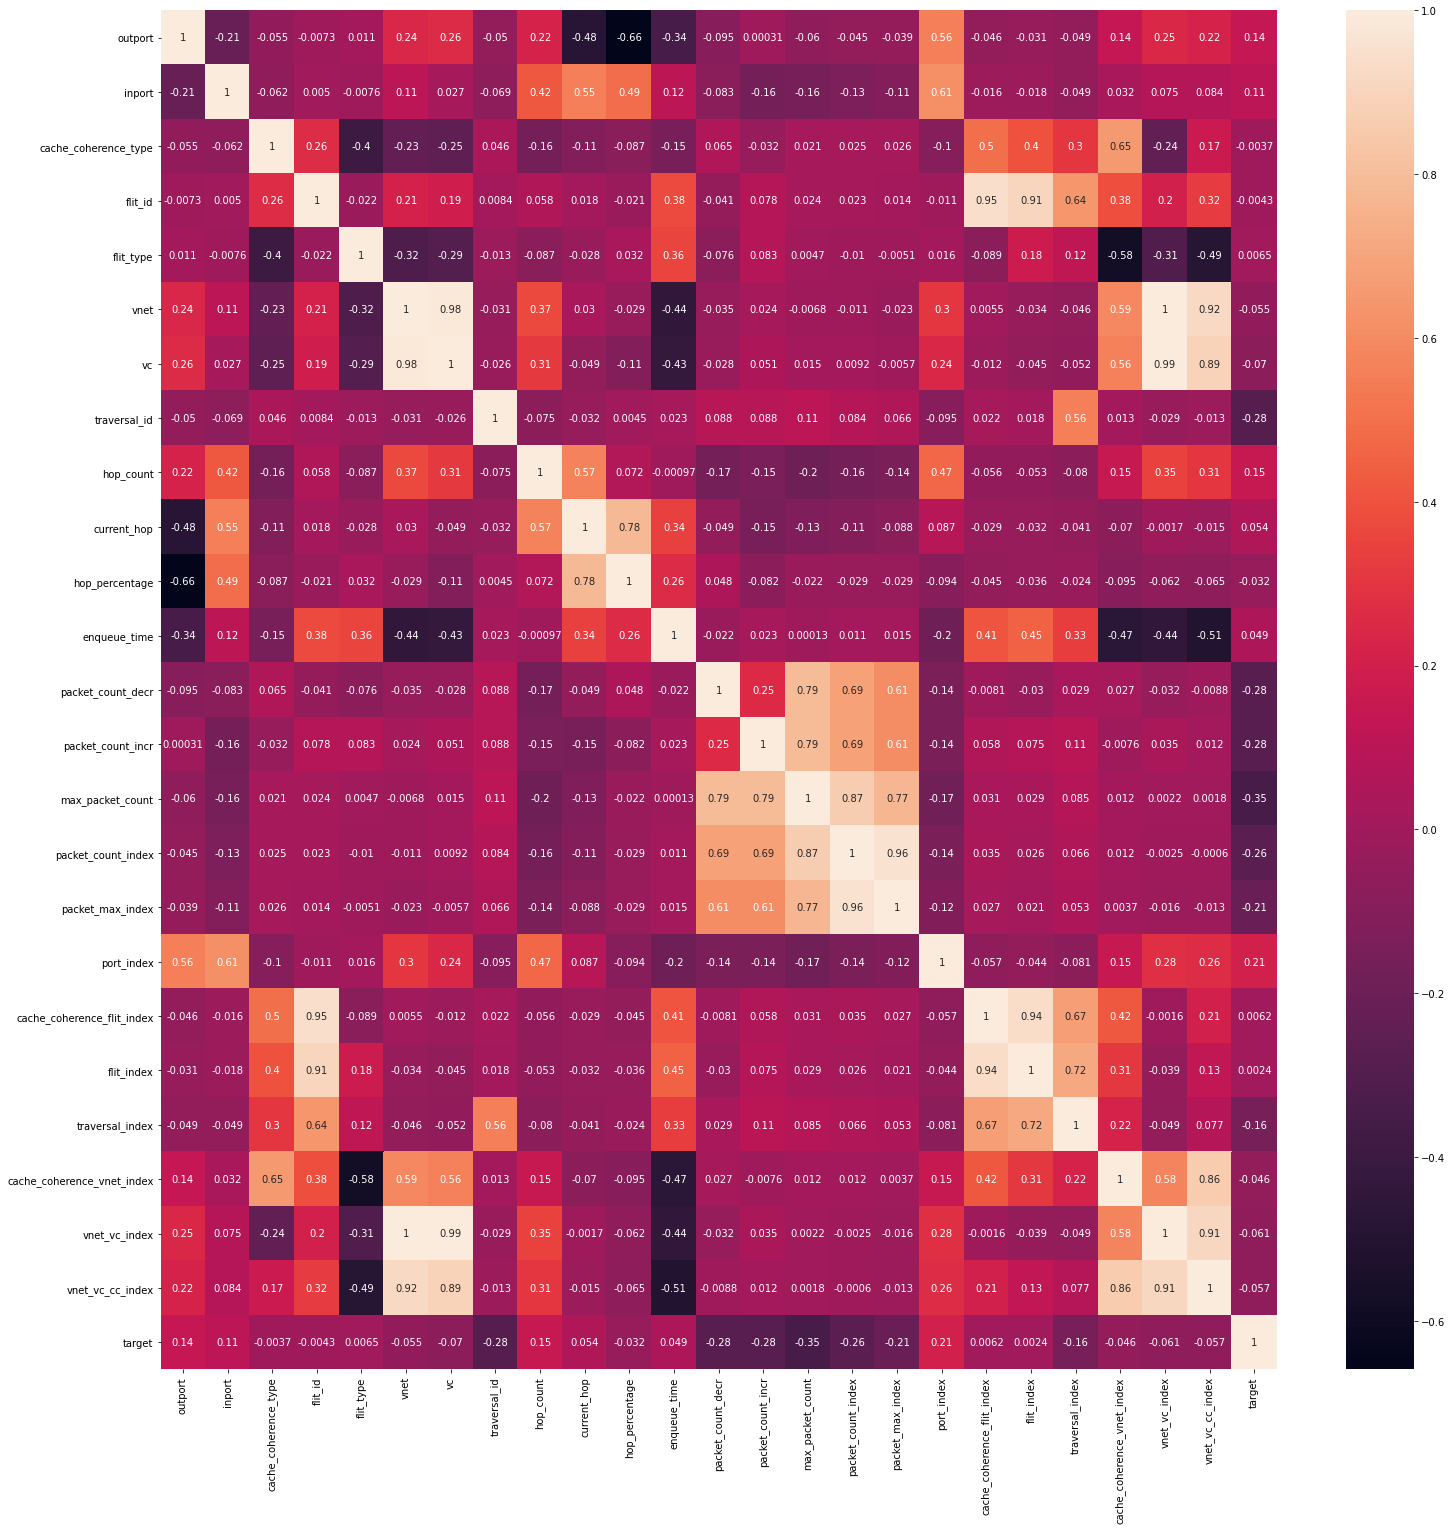

In [326]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), annot = True)
plt.show()

Processing Dataset for Training

In [327]:
train_X = df.drop(columns=['target'])
train_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,2,0,1,1,4,3,9,3,1,0,0.0,4,8,1,8,8,64,0,1,4,12,3,27,9
1,2,4,1,1,4,3,9,2,2,1,0.5,8,11,1,11,11,121,8,1,4,8,3,27,9
2,4,2,4,1,1,5,17,2,2,1,0.5,8,10,2,11,20,220,8,4,4,8,20,85,100
3,4,2,4,2,2,5,17,2,2,1,0.5,9,9,3,11,27,297,8,8,16,32,20,85,100
4,4,2,4,3,2,5,17,2,2,1,0.5,10,8,4,11,32,352,8,12,24,48,20,85,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442259,2,0,6,4,2,3,10,20059,1,0,0.0,25,2,10,11,20,220,0,24,48,962832,18,30,54
442260,2,0,6,5,3,3,10,20059,1,0,0.0,32,1,11,11,11,121,0,30,90,1805310,18,30,54
442261,2,0,2,1,4,3,11,20060,1,0,0.0,32,3,1,3,3,9,0,2,8,160480,6,33,18
442262,2,0,7,1,4,3,12,20059,3,0,0.0,5,2,2,3,4,12,0,7,28,561652,21,36,63


In [328]:
#standardization
x = train_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = train_X.columns
x_scaled = min_max_scaler.fit_transform(x)
train_X = pd.DataFrame(x_scaled)
train_X.columns = columns
train_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.5,0.0,0.000000,0.00,1.000000,0.0,0.000000,0.000066,0.2,0.00,0.0,0.000000,0.189189,0.000000,0.189189,0.018470,0.004363,0.000000,0.000000,0.000000,0.000003,0.000000,0.000000,0.000000
1,0.5,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.000033,0.4,0.25,0.5,0.062500,0.270270,0.000000,0.270270,0.026385,0.008311,0.666667,0.000000,0.000000,0.000001,0.000000,0.000000,0.000000
2,1.0,0.5,0.500000,0.00,0.000000,1.0,0.888889,0.000033,0.4,0.25,0.5,0.062500,0.243243,0.027027,0.270270,0.050132,0.015167,0.666667,0.103448,0.000000,0.000001,0.944444,0.920635,1.000000
3,1.0,0.5,0.500000,0.25,0.333333,1.0,0.888889,0.000033,0.4,0.25,0.5,0.078125,0.216216,0.054054,0.270270,0.068602,0.020500,0.666667,0.241379,0.139535,0.000010,0.944444,0.920635,1.000000
4,1.0,0.5,0.500000,0.50,0.333333,1.0,0.888889,0.000033,0.4,0.25,0.5,0.093750,0.189189,0.081081,0.270270,0.081794,0.024309,0.666667,0.379310,0.232558,0.000016,0.944444,0.920635,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442259,0.5,0.0,0.833333,0.75,0.333333,0.0,0.111111,0.666600,0.2,0.00,0.0,0.328125,0.027027,0.243243,0.270270,0.050132,0.015167,0.000000,0.793103,0.511628,0.355537,0.833333,0.047619,0.494505
442260,0.5,0.0,0.833333,1.00,0.666667,0.0,0.111111,0.666600,0.2,0.00,0.0,0.437500,0.000000,0.270270,0.270270,0.026385,0.008311,0.000000,1.000000,1.000000,0.666633,0.833333,0.047619,0.494505
442261,0.5,0.0,0.166667,0.00,1.000000,0.0,0.222222,0.666633,0.2,0.00,0.0,0.437500,0.054054,0.000000,0.054054,0.005277,0.000554,0.000000,0.034483,0.046512,0.059258,0.166667,0.095238,0.098901
442262,0.5,0.0,1.000000,0.00,1.000000,0.0,0.333333,0.666600,0.6,0.00,0.0,0.015625,0.027027,0.027027,0.054054,0.007916,0.000762,0.000000,0.206897,0.279070,0.207396,1.000000,0.142857,0.593407


In [329]:
train_X[train_X.duplicated()].shape

(10782, 24)

In [0]:
test_X = df5.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y = df5['target']

In [331]:
#standardization
x = test_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X = pd.DataFrame(x_scaled)
test_X.columns = columns
test_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.75,0.5,0.500000,0.00,0.000000,1.0,0.888889,0.000033,0.25,0.25,0.5,0.062500,0.181818,0.000000,0.181818,0.019672,0.004614,0.5,0.103448,0.000000,0.000001,0.944444,0.920635,1.000000
1,0.75,0.5,0.500000,0.25,0.333333,1.0,0.888889,0.000033,0.25,0.25,0.5,0.078125,0.151515,0.030303,0.181818,0.036066,0.007978,0.5,0.241379,0.139535,0.000010,0.944444,0.920635,1.000000
2,0.75,0.5,0.500000,0.50,0.333333,1.0,0.888889,0.000033,0.25,0.25,0.5,0.093750,0.121212,0.060606,0.181818,0.045902,0.009997,0.5,0.379310,0.232558,0.000016,0.944444,0.920635,1.000000
3,0.75,0.5,0.500000,0.75,0.333333,1.0,0.888889,0.000033,0.25,0.25,0.5,0.109375,0.090909,0.090909,0.181818,0.049180,0.010670,0.5,0.517241,0.325581,0.000022,0.944444,0.920635,1.000000
4,0.75,0.5,0.500000,1.00,0.666667,1.0,0.888889,0.000033,0.25,0.25,0.5,0.171875,0.060606,0.121212,0.181818,0.045902,0.009997,0.5,0.655172,0.651163,0.000043,0.944444,0.920635,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80528,0.50,0.0,0.833333,0.75,0.333333,0.0,0.111111,0.999967,0.00,0.00,0.0,0.328125,0.121212,0.060606,0.181818,0.045902,0.009997,0.0,0.793103,0.511628,0.533333,0.833333,0.047619,0.494505
80529,0.50,0.0,0.833333,1.00,0.666667,0.0,0.111111,0.999967,0.00,0.00,0.0,0.437500,0.090909,0.090909,0.181818,0.049180,0.010670,0.0,1.000000,1.000000,1.000000,0.833333,0.047619,0.494505
80530,0.50,0.0,0.166667,0.00,1.000000,0.0,0.222222,1.000000,0.00,0.00,0.0,0.437500,0.060606,0.121212,0.181818,0.045902,0.009997,0.0,0.034483,0.046512,0.088890,0.166667,0.095238,0.098901
80531,0.50,0.0,1.000000,0.00,1.000000,0.0,0.333333,0.999967,0.25,0.00,0.0,0.015625,0.030303,0.151515,0.181818,0.036066,0.007978,0.0,0.206897,0.279070,0.311110,1.000000,0.142857,0.593407


In [332]:
test_X[test_X.duplicated()].shape

(36, 24)

In [333]:
test_X1 = df6.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y1 = df6['target']
x = test_X1.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X1.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X1 = pd.DataFrame(x_scaled)
test_X1.columns = columns
print(test_X1[test_X1.duplicated()].shape)
test_X1

(34, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.5,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.000067,0.25,0.333333,0.5,0.062500,0.189189,0.000000,0.189189,0.018470,0.004363,0.666667,0.000000,0.000000,0.000003,0.000000,0.000000,0.000000
1,1.0,0.5,0.500000,0.00,0.000000,1.0,0.888889,0.000067,0.25,0.333333,0.5,0.062500,0.162162,0.027027,0.189189,0.034301,0.007688,0.666667,0.103448,0.000000,0.000003,0.944444,0.920635,1.000000
2,1.0,0.5,0.500000,0.25,0.333333,1.0,0.888889,0.000067,0.25,0.333333,0.5,0.078125,0.135135,0.054054,0.189189,0.044855,0.009904,0.666667,0.241379,0.139535,0.000016,0.944444,0.920635,1.000000
3,1.0,0.5,0.500000,0.50,0.333333,1.0,0.888889,0.000067,0.25,0.333333,0.5,0.093750,0.108108,0.081081,0.189189,0.050132,0.011012,0.666667,0.379310,0.232558,0.000025,0.944444,0.920635,1.000000
4,1.0,0.5,0.500000,0.75,0.333333,1.0,0.888889,0.000067,0.25,0.333333,0.5,0.109375,0.081081,0.108108,0.189189,0.050132,0.011012,0.666667,0.517241,0.325581,0.000034,0.944444,0.920635,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67755,0.5,0.0,0.833333,0.00,0.000000,0.0,0.111111,0.999967,0.00,0.000000,0.0,0.000000,0.108108,0.162162,0.270270,0.089710,0.026595,0.000000,0.172414,0.023256,0.066665,0.833333,0.047619,0.494505
67756,0.5,0.0,0.833333,0.25,0.333333,0.0,0.111111,0.999967,0.00,0.000000,0.0,0.109375,0.081081,0.189189,0.270270,0.081794,0.024309,0.000000,0.379310,0.232558,0.266666,0.833333,0.047619,0.494505
67757,0.5,0.0,0.833333,0.50,0.333333,0.0,0.111111,0.999967,0.00,0.000000,0.0,0.218750,0.054054,0.216216,0.270270,0.068602,0.020500,0.000000,0.586207,0.372093,0.399999,0.833333,0.047619,0.494505
67758,0.5,0.0,0.833333,0.75,0.333333,0.0,0.111111,0.999967,0.00,0.000000,0.0,0.328125,0.027027,0.243243,0.270270,0.050132,0.015167,0.000000,0.793103,0.511628,0.533333,0.833333,0.047619,0.494505


In [334]:
test_X2 = df7.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y2 = df7['target']
x = test_X2.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X2.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X2 = pd.DataFrame(x_scaled)
test_X2.columns = columns
print(test_X2[test_X2.duplicated()].shape)
test_X2

(43, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.25,0.5,0.500000,0.00,0.000000,1.0,0.888889,0.000067,0.25,0.333333,0.5,0.068966,0.171429,0.000000,0.171429,0.017595,0.003899,0.166667,0.103448,0.000000,0.000003,0.944444,0.920635,1.000000
1,0.25,0.5,0.500000,0.25,0.333333,1.0,0.888889,0.000067,0.25,0.333333,0.5,0.086207,0.142857,0.028571,0.171429,0.032258,0.006742,0.166667,0.241379,0.139535,0.000016,0.944444,0.920635,1.000000
2,0.25,0.5,0.500000,0.50,0.333333,1.0,0.888889,0.000067,0.25,0.333333,0.5,0.103448,0.114286,0.057143,0.171429,0.041056,0.008448,0.166667,0.379310,0.232558,0.000025,0.944444,0.920635,1.000000
3,0.25,0.5,0.500000,0.75,0.333333,1.0,0.888889,0.000067,0.25,0.333333,0.5,0.120690,0.085714,0.085714,0.171429,0.043988,0.009016,0.166667,0.517241,0.325581,0.000034,0.944444,0.920635,1.000000
4,0.25,0.5,0.500000,1.00,0.666667,1.0,0.888889,0.000067,0.25,0.333333,0.5,0.189655,0.057143,0.114286,0.171429,0.041056,0.008448,0.166667,0.655172,0.651163,0.000065,0.944444,0.920635,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65859,0.50,0.0,0.833333,0.75,0.333333,0.0,0.111111,0.999967,0.00,0.000000,0.0,0.362069,0.085714,0.228571,0.314286,0.102639,0.035009,0.000000,0.793103,0.511628,0.533333,0.833333,0.047619,0.494505
65860,0.50,0.0,0.833333,1.00,0.666667,0.0,0.111111,0.999967,0.00,0.000000,0.0,0.482759,0.057143,0.257143,0.314286,0.085044,0.029161,0.000000,1.000000,1.000000,1.000000,0.833333,0.047619,0.494505
65861,0.50,0.0,0.166667,0.00,1.000000,0.0,0.222222,1.000000,0.00,0.000000,0.0,0.482759,0.028571,0.285714,0.314286,0.061584,0.021363,0.000000,0.034483,0.046512,0.088890,0.166667,0.095238,0.098901
65862,0.50,0.0,1.000000,0.00,1.000000,0.0,0.333333,0.999967,0.25,0.000000,0.0,0.017241,0.000000,0.314286,0.314286,0.032258,0.011616,0.000000,0.206897,0.279070,0.311110,1.000000,0.142857,0.593407


In [335]:
test_X3 = df8.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y3 = df8['target']
x = test_X3.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X3.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X3 = pd.DataFrame(x_scaled)
test_X3.columns = columns
print(test_X3[test_X3.duplicated()].shape)
test_X3

(24, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,1.0,0.5,0.500000,0.00,0.000000,1.0,0.888889,0.0,0.75,0.25,0.25,0.063492,0.181818,0.000000,0.181818,0.019672,0.004614,0.666667,0.103448,0.000000,0.000000,0.944444,0.920635,1.000000
1,1.0,0.5,0.500000,0.25,0.333333,1.0,0.888889,0.0,0.75,0.25,0.25,0.079365,0.151515,0.030303,0.181818,0.036066,0.007978,0.666667,0.241379,0.139535,0.000004,0.944444,0.920635,1.000000
2,1.0,0.5,0.500000,0.50,0.333333,1.0,0.888889,0.0,0.75,0.25,0.25,0.095238,0.121212,0.060606,0.181818,0.045902,0.009997,0.666667,0.379310,0.232558,0.000007,0.944444,0.920635,1.000000
3,1.0,0.5,0.500000,0.75,0.333333,1.0,0.888889,0.0,0.75,0.25,0.25,0.111111,0.090909,0.090909,0.181818,0.049180,0.010670,0.666667,0.517241,0.325581,0.000010,0.944444,0.920635,1.000000
4,1.0,0.5,0.500000,1.00,0.666667,1.0,0.888889,0.0,0.75,0.25,0.25,0.174603,0.060606,0.121212,0.181818,0.045902,0.009997,0.666667,0.655172,0.651163,0.000021,0.944444,0.920635,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55151,1.0,0.5,0.500000,0.00,0.000000,1.0,0.888889,1.0,1.00,0.25,0.20,0.063492,0.121212,0.181818,0.303030,0.111475,0.036912,0.666667,0.103448,0.000000,0.044445,0.944444,0.920635,1.000000
55152,1.0,0.5,0.500000,0.25,0.333333,1.0,0.888889,1.0,1.00,0.25,0.20,0.079365,0.090909,0.212121,0.303030,0.101639,0.033740,0.666667,0.241379,0.139535,0.177782,0.944444,0.920635,1.000000
55153,1.0,0.5,0.500000,0.50,0.333333,1.0,0.888889,1.0,1.00,0.25,0.20,0.095238,0.060606,0.242424,0.303030,0.085246,0.028453,0.666667,0.379310,0.232558,0.266674,0.944444,0.920635,1.000000
55154,1.0,0.5,0.500000,0.75,0.333333,1.0,0.888889,1.0,1.00,0.25,0.20,0.111111,0.030303,0.272727,0.303030,0.062295,0.021052,0.666667,0.517241,0.325581,0.355566,0.944444,0.920635,1.000000


In [336]:
test_X4 = df9.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y4 = df9['target']
x = test_X4.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X4.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X4 = pd.DataFrame(x_scaled)
test_X4.columns = columns
print(test_X4[test_X4.duplicated()].shape)
test_X4

(26, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,1.0,0.5,0.500000,0.00,0.000000,1.0,0.888889,0.000067,0.75,0.333333,0.25,0.063492,0.193548,0.000000,0.193548,0.022140,0.005515,0.666667,0.103448,0.000000,0.000003,0.944444,0.920635,1.000000
1,1.0,0.5,0.500000,0.25,0.333333,1.0,0.888889,0.000067,0.75,0.333333,0.25,0.079365,0.161290,0.032258,0.193548,0.040590,0.009537,0.666667,0.241379,0.139535,0.000016,0.944444,0.920635,1.000000
2,1.0,0.5,0.500000,0.50,0.333333,1.0,0.888889,0.000067,0.75,0.333333,0.25,0.095238,0.129032,0.064516,0.193548,0.051661,0.011950,0.666667,0.379310,0.232558,0.000025,0.944444,0.920635,1.000000
3,1.0,0.5,0.500000,0.75,0.333333,1.0,0.888889,0.000067,0.75,0.333333,0.25,0.111111,0.096774,0.096774,0.193548,0.055351,0.012754,0.666667,0.517241,0.325581,0.000034,0.944444,0.920635,1.000000
4,1.0,0.5,0.500000,1.00,0.666667,1.0,0.888889,0.000067,0.75,0.333333,0.25,0.174603,0.064516,0.129032,0.193548,0.051661,0.011950,0.666667,0.655172,0.651163,0.000065,0.944444,0.920635,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55272,1.0,0.5,0.500000,0.25,0.333333,1.0,0.888889,1.000000,0.75,0.333333,0.25,0.079365,0.129032,0.032258,0.161290,0.033210,0.006779,0.666667,0.241379,0.139535,0.177782,0.944444,0.920635,1.000000
55273,1.0,0.5,0.500000,0.50,0.333333,1.0,0.888889,1.000000,0.75,0.333333,0.25,0.095238,0.096774,0.064516,0.161290,0.040590,0.008158,0.666667,0.379310,0.232558,0.266674,0.944444,0.920635,1.000000
55274,1.0,0.5,0.500000,0.75,0.333333,1.0,0.888889,1.000000,0.75,0.333333,0.25,0.111111,0.064516,0.096774,0.161290,0.040590,0.008158,0.666667,0.517241,0.325581,0.355566,0.944444,0.920635,1.000000
55275,0.0,0.5,0.333333,0.00,1.000000,0.0,0.000000,1.000000,0.00,0.333333,1.00,0.126984,0.032258,0.129032,0.161290,0.033210,0.006779,0.000000,0.068966,0.093023,0.133336,0.333333,0.000000,0.197802


In [337]:
test_X5 = df10.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y5 = df10['target']
x = test_X5.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X5.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X5 = pd.DataFrame(x_scaled)
test_X5.columns = columns
print(test_X5[test_X5.duplicated()].shape)
test_X5

(14, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,1.0,0.50,0.500000,0.00,0.000000,1.0,0.888889,0.000000,0.75,0.333333,0.25,0.070175,0.03125,0.00000,0.03125,0.003472,0.000315,0.666667,0.103448,0.000000,0.000000,0.944444,0.920635,1.000000
1,1.0,0.50,0.500000,0.25,0.333333,1.0,0.888889,0.000000,0.75,0.333333,0.25,0.087719,0.00000,0.03125,0.03125,0.003472,0.000315,0.666667,0.241379,0.139535,0.000004,0.944444,0.920635,1.000000
2,1.0,0.50,0.500000,0.50,0.333333,1.0,0.888889,0.000000,0.75,0.333333,0.25,0.105263,0.06250,0.00000,0.06250,0.006944,0.000839,0.666667,0.379310,0.232558,0.000007,0.944444,0.920635,1.000000
3,1.0,0.50,0.500000,0.75,0.333333,1.0,0.888889,0.000000,0.75,0.333333,0.25,0.122807,0.03125,0.03125,0.06250,0.010417,0.001154,0.666667,0.517241,0.325581,0.000010,0.944444,0.920635,1.000000
4,1.0,0.50,0.500000,1.00,0.666667,1.0,0.888889,0.000000,0.75,0.333333,0.25,0.192982,0.00000,0.06250,0.06250,0.006944,0.000839,0.666667,0.655172,0.651163,0.000021,0.944444,0.920635,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58120,0.5,1.00,0.500000,0.75,0.333333,1.0,0.888889,0.999967,1.00,0.666667,0.40,0.210526,0.12500,0.00000,0.12500,0.013889,0.002517,0.666667,0.517241,0.325581,0.355756,0.944444,0.920635,1.000000
58121,0.5,1.00,0.500000,1.00,0.666667,1.0,0.888889,0.999967,1.00,0.666667,0.40,0.280702,0.09375,0.03125,0.12500,0.024306,0.004090,0.666667,0.655172,0.651163,0.667043,0.944444,0.920635,1.000000
58122,0.0,0.25,0.666667,0.00,0.000000,0.0,0.000000,1.000000,0.50,1.000000,1.00,0.210526,0.06250,0.06250,0.12500,0.027778,0.004614,0.000000,0.137931,0.011628,0.055587,0.666667,0.000000,0.395604
58123,0.0,0.25,0.666667,0.25,0.333333,0.0,0.000000,1.000000,0.50,1.000000,1.00,0.333333,0.03125,0.09375,0.12500,0.024306,0.004090,0.000000,0.310345,0.186047,0.222354,0.666667,0.000000,0.395604


In [338]:
test_X6 = df14.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y6 = df14['target']
x = test_X6.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X6.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X6 = pd.DataFrame(x_scaled)
test_X6.columns = columns
print(test_X6[test_X6.duplicated()].shape)
test_X6

(46, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.25,0.5,0.500000,0.00,0.000000,1.0,0.888889,0.00005,0.25,0.333333,0.50,0.066667,0.36,0.00,0.36,0.049724,0.020926,0.166667,0.103448,0.000000,0.000002,0.944444,0.920635,1.000000
1,0.25,0.5,0.500000,0.25,0.333333,1.0,0.888889,0.00005,0.25,0.333333,0.50,0.083333,0.32,0.04,0.36,0.093923,0.037836,0.166667,0.241379,0.139535,0.000016,0.944444,0.920635,1.000000
2,0.25,0.5,0.500000,0.50,0.333333,1.0,0.888889,0.00005,0.25,0.333333,0.50,0.100000,0.28,0.08,0.36,0.127072,0.050518,0.166667,0.379310,0.232558,0.000024,0.944444,0.920635,1.000000
3,0.25,0.5,0.500000,0.75,0.333333,1.0,0.888889,0.00005,0.25,0.333333,0.50,0.116667,0.24,0.12,0.36,0.149171,0.058973,0.166667,0.517241,0.325581,0.000033,0.944444,0.920635,1.000000
4,0.25,0.5,0.500000,1.00,0.666667,1.0,0.888889,0.00005,0.25,0.333333,0.50,0.183333,0.20,0.16,0.36,0.160221,0.063200,0.166667,0.655172,0.651163,0.000064,0.944444,0.920635,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45217,1.00,0.5,0.500000,0.25,0.333333,1.0,0.888889,1.00000,0.75,0.333333,0.25,0.083333,0.16,0.32,0.48,0.243094,0.123441,0.666667,0.241379,0.139535,0.177785,0.944444,0.920635,1.000000
45218,1.00,0.5,0.500000,0.50,0.333333,1.0,0.888889,1.00000,0.75,0.333333,0.25,0.100000,0.12,0.36,0.48,0.215470,0.109702,0.666667,0.379310,0.232558,0.266678,0.944444,0.920635,1.000000
45219,1.00,0.5,0.500000,0.75,0.333333,1.0,0.888889,1.00000,0.75,0.333333,0.25,0.116667,0.08,0.40,0.48,0.176796,0.090467,0.666667,0.517241,0.325581,0.355572,0.944444,0.920635,1.000000
45220,0.00,0.5,0.333333,0.00,1.000000,0.0,0.000000,1.00000,0.00,0.333333,1.00,0.133333,0.04,0.44,0.48,0.127072,0.065737,0.000000,0.068966,0.093023,0.133338,0.333333,0.000000,0.197802


#### Machine Learning Models

Module Imports for Data Processing and Report Generation in Machine Learning Models

In [0]:
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn import metrics

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

Labels

1.   0 -  malicious
2.   1 -  good



In [340]:
train_Y = df['target']
train_Y.value_counts()

0    285149
1    157115
Name: target, dtype: int64

Training and Validation Splitting of the Dataset

In [0]:
seed = 5
np.random.seed(seed)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.2, random_state=seed, shuffle=True)

Feature Selection

                 Specs         Score
14    max_packet_count  10060.550571
13   packet_count_incr   5042.563674
12   packet_count_decr   5017.993038
7         traversal_id   4848.710191
17          port_index   3681.095235
15  packet_count_index   3519.054933
16    packet_max_index   1821.453174
20     traversal_index   1497.338831
0              outport   1483.577800
6                   vc    826.879367
1               inport    826.622432
22       vnet_vc_index    729.770202
8            hop_count    705.082936
5                 vnet    697.306666
23    vnet_vc_cc_index    221.165525
9          current_hop    145.207922
11        enqueue_time     99.695727


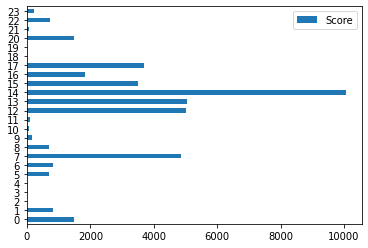

In [343]:
#SelectKBest for feature selection
bf = SelectKBest(score_func=chi2, k=17)
fit = bf.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 
print(featureScores.nlargest(17,'Score'))
featureScores.plot(kind='barh')

Logistic Regression

In [0]:
#logistic regression
from sklearn.linear_model import LogisticRegression

In [0]:
logit_model=sm.Logit(train_Y,train_X)
#result=logit_model.fit()
#print(result.summary2())

In [346]:
logreg = LogisticRegression(C=5,penalty='l2',random_state=42, max_iter=500)
logreg.fit(X_train, y_train)

LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [347]:
y_pred = logreg.predict(X_test)
logreg_score_train = logreg.score(X_train,y_train)
print("Train Prediction Score",logreg_score_train*100)
logreg_score_test = accuracy_score(y_test,y_pred)
print("Test Prediction ",logreg_score_test*100)

Train Prediction Score 73.77243782697542
Test Prediction  73.98279312177088


In [348]:
y_pred_test = logreg.predict(test_X)
logreg_score_test = accuracy_score(test_Y,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  87.1891026039015


In [349]:
y_pred_test = logreg.predict(test_X1)
logreg_score_test = accuracy_score(test_Y1,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  85.53423848878394


In [350]:
y_pred_test = logreg.predict(test_X2)
logreg_score_test = accuracy_score(test_Y2,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  90.8478076035467


In [351]:
y_pred_test = logreg.predict(test_X3)
logreg_score_test = accuracy_score(test_Y3,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  73.58945536297048


In [352]:
y_pred_test = logreg.predict(test_X4)
logreg_score_test = accuracy_score(test_Y4,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  84.97024078730756


In [353]:
y_pred_test = logreg.predict(test_X5)
logreg_score_test = accuracy_score(test_Y5,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  85.91311827956989


In [354]:
y_pred_test = logreg.predict(test_X6)
logreg_score_test = accuracy_score(test_Y6,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  12.918490999955774


In [355]:
feature_importance=pd.DataFrame(np.hstack((np.array([columns[::]]).T, logreg.coef_.T)), columns=['feature', 'importance'])
feature_importance['importance']=pd.to_numeric(feature_importance['importance'])
feature_importance.sort_values(by='importance', ascending=False)

,feature,importance
16,packet_max_index,5.071759
17,port_index,2.800913
8,hop_count,2.075890
11,enqueue_time,1.911328
15,packet_count_index,1.548794
10,hop_percentage,1.394092
3,flit_id,0.836785
6,vc,0.463805
2,cache_coherence_type,0.449875
19,flit_index,0.160857


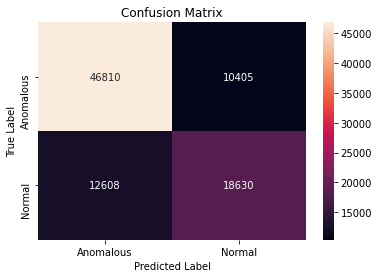

In [356]:
cm = confusion_matrix(y_test, y_pred)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [357]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.82      0.80     57215
           1       0.64      0.60      0.62     31238

    accuracy                           0.74     88453
   macro avg       0.71      0.71      0.71     88453
weighted avg       0.74      0.74      0.74     88453



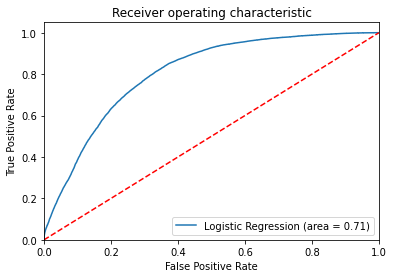

In [358]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('LOG_ROC')
plt.show()

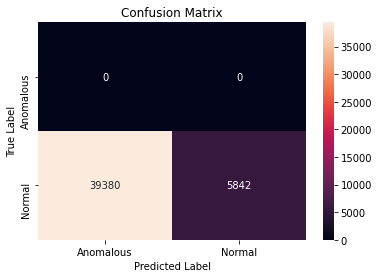

In [359]:
cm = confusion_matrix(test_Y6, y_pred_test)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [360]:
print(classification_report(test_Y6, y_pred_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.13      0.23     45222

    accuracy                           0.13     45222
   macro avg       0.50      0.06      0.11     45222
weighted avg       1.00      0.13      0.23     45222



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


KNeighbors Classifier

In [361]:
#KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
y_pred_knn= knn.predict(X_test)

In [363]:
knn_score_train = knn.score(X_train,y_train)
print("Train Prediction Score",knn_score_train*100)
knn_score_test = accuracy_score(y_test,y_pred_knn)
print("Test Prediction ",knn_score_test*100)

Train Prediction Score 90.5915870337553
Test Prediction  85.70088069370175


In [364]:
y_pred_knn_test= knn.predict(test_X)
knn_score_test = accuracy_score(test_Y,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  72.85460618628389


In [365]:
y_pred_knn_test= knn.predict(test_X1)
knn_score_test = accuracy_score(test_Y1,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  57.064639905549


In [366]:
y_pred_knn_test= knn.predict(test_X2)
knn_score_test = accuracy_score(test_Y2,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  89.98694279120613


In [367]:
y_pred_knn_test= knn.predict(test_X3)
knn_score_test = accuracy_score(test_Y3,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  70.29516281093625


In [368]:
y_pred_knn_test= knn.predict(test_X4)
knn_score_test = accuracy_score(test_Y4,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  76.07323118114225


In [369]:
y_pred_knn_test= knn.predict(test_X5)
knn_score_test = accuracy_score(test_Y5,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  68.9789247311828


In [370]:
y_pred_knn_test= knn.predict(test_X6)
knn_score_test = accuracy_score(test_Y6,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  17.847507850161428


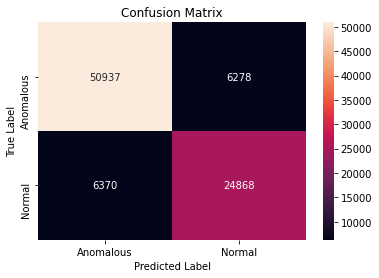

In [371]:
cm = confusion_matrix(y_test, y_pred_knn)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [372]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89     57215
           1       0.80      0.80      0.80     31238

    accuracy                           0.86     88453
   macro avg       0.84      0.84      0.84     88453
weighted avg       0.86      0.86      0.86     88453



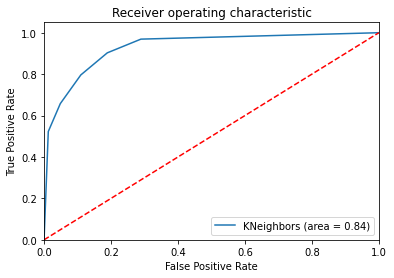

In [373]:
knn_roc_auc = roc_auc_score(y_test, y_pred_knn)
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNeighbors (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('KNN_ROC')
plt.show()

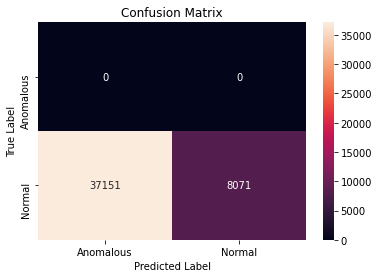

In [374]:
cm = confusion_matrix(test_Y6, y_pred_knn_test)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [375]:
print(classification_report(test_Y6,y_pred_knn_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.18      0.30     45222

    accuracy                           0.18     45222
   macro avg       0.50      0.09      0.15     45222
weighted avg       1.00      0.18      0.30     45222



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Naive Bayes Classifier

In [0]:
#naive_bayes
from sklearn.naive_bayes import GaussianNB

In [377]:
nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
y_pred_nb= nb.predict(X_test)

In [379]:
nb_score_train = nb.score(X_train,y_train)
print("Train Prediction Score",nb_score_train*100)
nb_score_test = accuracy_score(y_test,y_pred_nb)
print("Test Prediction Score",nb_score_test*100)

Train Prediction Score 63.29000511572562
Test Prediction Score 63.033475405017356


In [380]:
y_pred_nb_test= nb.predict(test_X)
nb_score_test = accuracy_score(test_Y,y_pred_nb_test)
print("Test Prediction Score",nb_score_test*100)

Test Prediction Score 52.51387629915687


In [381]:
y_pred_nb_test= nb.predict(test_X1)
nb_score_test = accuracy_score(test_Y1,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  43.23789846517119


In [382]:
y_pred_nb_test= nb.predict(test_X2)
nb_score_test = accuracy_score(test_Y2,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  44.03771407749302


In [383]:
y_pred_nb_test= nb.predict(test_X3)
nb_score_test = accuracy_score(test_Y3,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  36.64877801145841


In [384]:
y_pred_nb_test= nb.predict(test_X4)
nb_score_test = accuracy_score(test_Y4,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  38.45903359444253


In [385]:
y_pred_nb_test= nb.predict(test_X5)
nb_score_test = accuracy_score(test_Y5,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  38.00774193548387


In [386]:
y_pred_nb_test= nb.predict(test_X6)
nb_score_test = accuracy_score(test_Y6,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  67.73915350935386


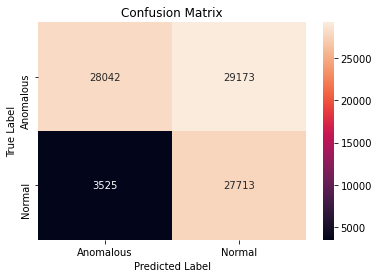

In [387]:
cm = confusion_matrix(y_test, y_pred_nb)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [388]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.89      0.49      0.63     57215
           1       0.49      0.89      0.63     31238

    accuracy                           0.63     88453
   macro avg       0.69      0.69      0.63     88453
weighted avg       0.75      0.63      0.63     88453



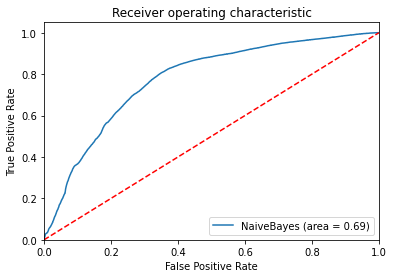

In [389]:
nb_roc_auc = roc_auc_score(y_test, y_pred_nb)
fpr, tpr, thresholds = roc_curve(y_test, nb.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='NaiveBayes (area = %0.2f)' % nb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('NB_ROC')
plt.show()

### Neural Networks

In [0]:
#neuralnetwork
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization, Dropout
from keras.optimizers import SGD
from keras.layers import PReLU

2-Layer Neural Network

In [391]:
#2layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(2, activation='relu', input_shape=(n_cols,)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2 )

Train on 283048 samples, validate on 70763 samples
Epoch 1/10
283048/283048 [==============================] - 13s 45us/step - loss: 0.1867 - accuracy: 0.7168 - val_loss: 0.1736 - val_accuracy: 0.7364
Epoch 2/10
283048/283048 [==============================] - 11s 40us/step - loss: 0.1724 - accuracy: 0.7361 - val_loss: 0.1722 - val_accuracy: 0.7363
Epoch 3/10
283048/283048 [==============================] - 11s 40us/step - loss: 0.1713 - accuracy: 0.7371 - val_loss: 0.1715 - val_accuracy: 0.7365
Epoch 4/10
283048/283048 [==============================] - 11s 39us/step - loss: 0.1706 - accuracy: 0.7377 - val_loss: 0.1712 - val_accuracy: 0.7386
Epoch 5/10
283048/283048 [==============================] - 11s 39us/step - loss: 0.1702 - accuracy: 0.7386 - val_loss: 0.1707 - val_accuracy: 0.7392
Epoch 6/10
283048/283048 [==============================] - 11s 39us/step - loss: 0.1701 - accuracy: 0.7387 - val_loss: 0.1708 - val_accuracy: 0.7376
Epoch 7/10
283048/283048 [=======================

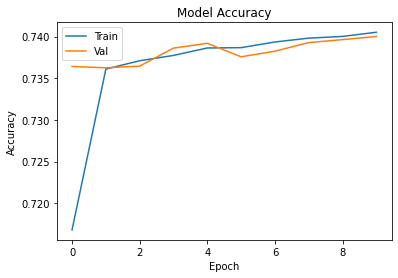

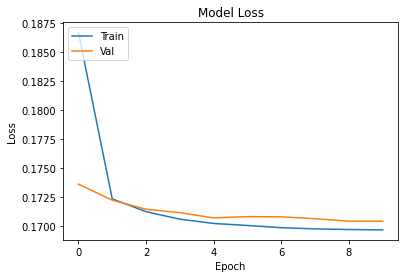

In [392]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [393]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 74.14%


In [394]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 87.41%


In [395]:
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 86.53%


In [396]:
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 91.37%


In [397]:
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 73.82%


In [398]:
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 84.92%


In [399]:
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 85.34%


In [400]:
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 12.66%


3-Layer Neural Network

In [401]:
#3layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(4, activation="relu", input_shape=(n_cols,)))
model.add(Dense(2, activation="relu"))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=30, validation_split=0.2 )

Train on 283048 samples, validate on 70763 samples
Epoch 1/30
283048/283048 [==============================] - 11s 40us/step - loss: 0.2292 - accuracy: 0.6444 - val_loss: 0.2274 - val_accuracy: 0.6458
Epoch 2/30
283048/283048 [==============================] - 11s 40us/step - loss: 0.2137 - accuracy: 0.6689 - val_loss: 0.1886 - val_accuracy: 0.7131
Epoch 3/30
283048/283048 [==============================] - 11s 39us/step - loss: 0.1782 - accuracy: 0.7279 - val_loss: 0.1729 - val_accuracy: 0.7350
Epoch 4/30
283048/283048 [==============================] - 11s 40us/step - loss: 0.1700 - accuracy: 0.7402 - val_loss: 0.1690 - val_accuracy: 0.7416
Epoch 5/30
283048/283048 [==============================] - 11s 37us/step - loss: 0.1668 - accuracy: 0.7466 - val_loss: 0.1659 - val_accuracy: 0.7491
Epoch 6/30
283048/283048 [==============================] - 11s 39us/step - loss: 0.1641 - accuracy: 0.7513 - val_loss: 0.1650 - val_accuracy: 0.7479
Epoch 7/30
283048/283048 [=======================

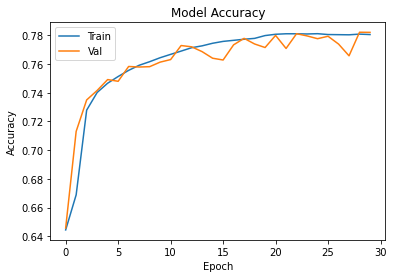

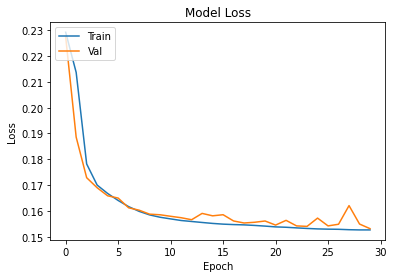

In [402]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [403]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 78.22%


In [404]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 78.97%
accuracy: 42.23%
accuracy: 54.15%
accuracy: 52.66%
accuracy: 36.84%
accuracy: 34.25%
accuracy: 49.84%


4-Layer Neural Network



In [405]:
#4layer
model = Sequential()
n_cols = X_train.shape[1]
n_cols
model.add(Dense(8, activation='relu', input_shape=(n_cols,)))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=30, validation_split=0.2)

Train on 283048 samples, validate on 70763 samples
Epoch 1/30
283048/283048 [==============================] - 12s 42us/step - loss: 0.2283 - accuracy: 0.6423 - val_loss: 0.2235 - val_accuracy: 0.6480
Epoch 2/30
283048/283048 [==============================] - 11s 40us/step - loss: 0.1837 - accuracy: 0.7214 - val_loss: 0.1630 - val_accuracy: 0.7495
Epoch 3/30
283048/283048 [==============================] - 12s 41us/step - loss: 0.1561 - accuracy: 0.7652 - val_loss: 0.1568 - val_accuracy: 0.7580
Epoch 4/30
283048/283048 [==============================] - 11s 40us/step - loss: 0.1486 - accuracy: 0.7777 - val_loss: 0.1456 - val_accuracy: 0.7866
Epoch 5/30
283048/283048 [==============================] - 11s 39us/step - loss: 0.1429 - accuracy: 0.7882 - val_loss: 0.1400 - val_accuracy: 0.7941
Epoch 6/30
283048/283048 [==============================] - 11s 39us/step - loss: 0.1385 - accuracy: 0.7945 - val_loss: 0.1370 - val_accuracy: 0.7962
Epoch 7/30
283048/283048 [=======================

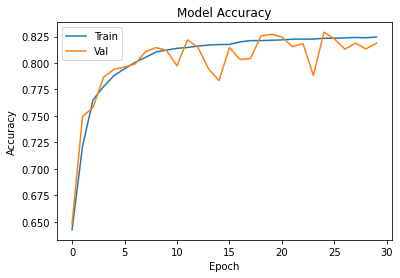

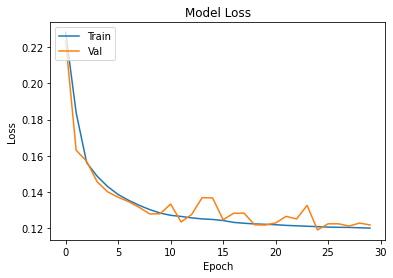

In [406]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [407]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 81.80%


In [408]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 73.71%
accuracy: 46.29%
accuracy: 71.04%
accuracy: 58.08%
accuracy: 61.65%
accuracy: 52.67%
accuracy: 34.89%


5-Layer Neural Network Optimized

In [409]:
#5layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(32, input_shape=(n_cols,),kernel_initializer='RandomUniform'))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(16))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(8))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(4))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dropout(0.001,seed=5))
model.add(Dense(1, activation='hard_sigmoid', kernel_initializer = "RandomUniform"))
opt = SGD(lr=0.02, momentum=0.9)
model.compile(optimizer=opt, loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2)

Train on 283048 samples, validate on 70763 samples
Epoch 1/100
283048/283048 [==============================] - 20s 71us/step - loss: 0.1329 - accuracy: 0.8026 - val_loss: 0.1185 - val_accuracy: 0.8261
Epoch 2/100
283048/283048 [==============================] - 21s 73us/step - loss: 0.1188 - accuracy: 0.8254 - val_loss: 0.1079 - val_accuracy: 0.8390
Epoch 3/100
283048/283048 [==============================] - 21s 73us/step - loss: 0.1147 - accuracy: 0.8306 - val_loss: 0.1079 - val_accuracy: 0.8409
Epoch 4/100
283048/283048 [==============================] - 20s 70us/step - loss: 0.1129 - accuracy: 0.8335 - val_loss: 0.1061 - val_accuracy: 0.8402
Epoch 5/100
283048/283048 [==============================] - 22s 77us/step - loss: 0.1115 - accuracy: 0.8353 - val_loss: 0.1078 - val_accuracy: 0.8365
Epoch 6/100
283048/283048 [==============================] - 20s 69us/step - loss: 0.1107 - accuracy: 0.8362 - val_loss: 0.1043 - val_accuracy: 0.8418
Epoch 7/100
283048/283048 [================

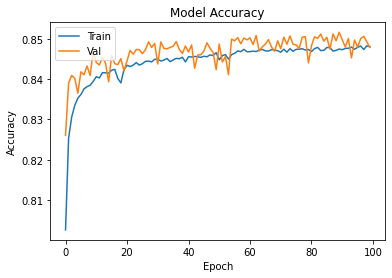

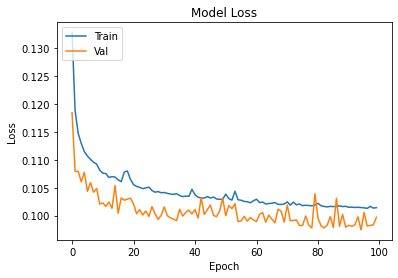

In [410]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [411]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 84.62%


In [412]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 61.63%
accuracy: 54.78%
accuracy: 87.16%
accuracy: 65.39%
accuracy: 72.68%
accuracy: 69.48%
accuracy: 22.66%


In [413]:
#6layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(32, input_shape=(n_cols,),kernel_initializer='RandomUniform'))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(16))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(8))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(4))
model.add(PReLU())
model.add(Dense(2))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dropout(0.001,seed=5))
model.add(Dense(1, activation='hard_sigmoid', kernel_initializer = "RandomUniform"))
opt = SGD(lr=0.02, momentum=0.9)
model.compile(optimizer=opt, loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2)

Train on 283048 samples, validate on 70763 samples
Epoch 1/50
283048/283048 [==============================] - 23s 80us/step - loss: 0.1373 - accuracy: 0.7952 - val_loss: 0.1210 - val_accuracy: 0.8259
Epoch 2/50
283048/283048 [==============================] - 21s 74us/step - loss: 0.1237 - accuracy: 0.8177 - val_loss: 0.1172 - val_accuracy: 0.8295
Epoch 3/50
283048/283048 [==============================] - 21s 74us/step - loss: 0.1178 - accuracy: 0.8264 - val_loss: 0.1107 - val_accuracy: 0.8321
Epoch 4/50
283048/283048 [==============================] - 22s 77us/step - loss: 0.1152 - accuracy: 0.8294 - val_loss: 0.1076 - val_accuracy: 0.8409
Epoch 5/50
283048/283048 [==============================] - 21s 75us/step - loss: 0.1135 - accuracy: 0.8318 - val_loss: 0.1043 - val_accuracy: 0.8414
Epoch 6/50
283048/283048 [==============================] - 21s 75us/step - loss: 0.1123 - accuracy: 0.8344 - val_loss: 0.1040 - val_accuracy: 0.8435
Epoch 7/50
283048/283048 [=======================

In [414]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 84.83%


In [415]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 73.64%
accuracy: 58.91%
accuracy: 72.82%
accuracy: 65.55%
accuracy: 68.65%
accuracy: 66.34%
accuracy: 48.20%


Decision Tree Classifier

In [0]:
#decisiontreee
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [417]:
dt = DecisionTreeClassifier(max_depth=24,max_features=24,random_state = 42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=24, max_features=24, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [0]:
y_pred_dt= dt.predict(X_test)

In [419]:
dt_score_train = dt.score(X_train,y_train)
print("Train Prediction Score",dt_score_train*100)
dt_score_test = accuracy_score(y_test,y_pred_dt)
print("Test Prediction Score",dt_score_test*100)

Train Prediction Score 95.8130188151301
Test Prediction Score 92.0748872282455


In [420]:
y_pred_dt_test= dt.predict(test_X)
dt_score_test = accuracy_score(test_Y,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X1)
dt_score_test = accuracy_score(test_Y1,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X2)
dt_score_test = accuracy_score(test_Y2,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X3)
dt_score_test = accuracy_score(test_Y3,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X4)
dt_score_test = accuracy_score(test_Y4,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X5)
dt_score_test = accuracy_score(test_Y5,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X6)
dt_score_test = accuracy_score(test_Y6,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)

Test Prediction Score 88.72511889535967
Test Prediction Score 70.62278630460449
Test Prediction Score 87.30414186809182
Test Prediction Score 76.91638262383059
Test Prediction Score 78.3562783797963
Test Prediction Score 74.90236559139785
Test Prediction Score 18.628101366591483


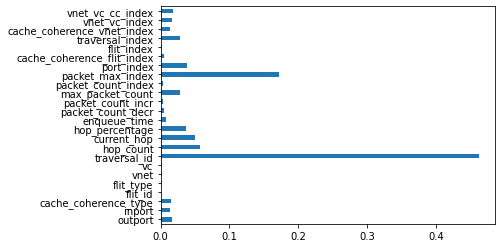

In [421]:
feat_importances = pd.Series(dt.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

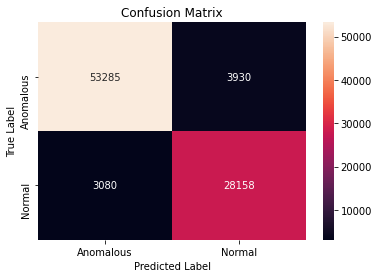

In [422]:
cm = confusion_matrix(y_test, y_pred_dt)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [423]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94     57215
           1       0.88      0.90      0.89     31238

    accuracy                           0.92     88453
   macro avg       0.91      0.92      0.91     88453
weighted avg       0.92      0.92      0.92     88453



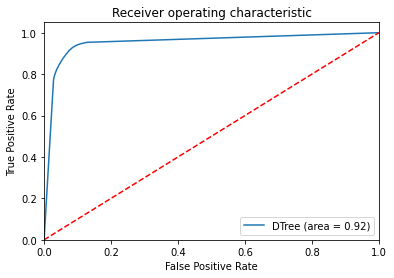

In [424]:
dt_roc_auc = roc_auc_score(y_test, y_pred_dt)
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='DTree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

Random Forest Classifier

In [0]:
#randomforest
from sklearn.ensemble import RandomForestClassifier

In [426]:
rf = RandomForestClassifier(max_depth=24,max_features=24,n_estimators=125,random_state=42)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=24, max_features=24,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=125,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [0]:
y_pred_rf= rf.predict(X_test)

In [428]:
rf_score_train = rf.score(X_train,y_train)
print("Train Prediction Score",rf_score_train*100)
rf_score_test = accuracy_score(y_test,y_pred_rf)
print("Test Prediction Score",rf_score_test*100)

Train Prediction Score 97.67446461528895
Test Prediction Score 92.71138344657615


In [429]:
y_pred_rf_test= rf.predict(test_X)
rf_score_test = accuracy_score(test_Y,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X1)
rf_score_test = accuracy_score(test_Y1,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X2)
rf_score_test = accuracy_score(test_Y2,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X3)
rf_score_test = accuracy_score(test_Y3,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X4)
rf_score_test = accuracy_score(test_Y4,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X5)
rf_score_test = accuracy_score(test_Y5,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X6)
rf_score_test = accuracy_score(test_Y6,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)

Test Prediction Score 89.42669464691492
Test Prediction Score 71.01682408500591
Test Prediction Score 88.25154864569416
Test Prediction Score 77.77757632895786
Test Prediction Score 79.24995929590969
Test Prediction Score 75.5010752688172
Test Prediction Score 18.115076732563796


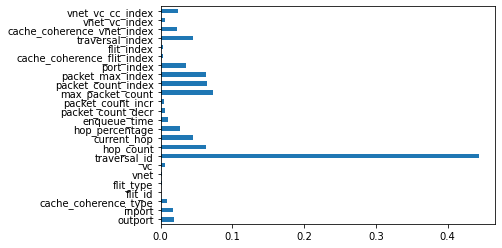

In [430]:
feat_importances = pd.Series(rf.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

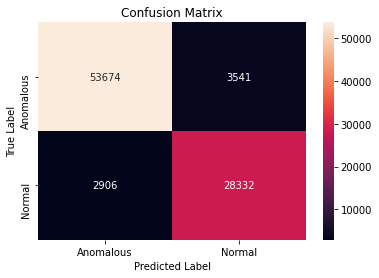

In [431]:
cm = confusion_matrix(y_test, y_pred_rf)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [432]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94     57215
           1       0.89      0.91      0.90     31238

    accuracy                           0.93     88453
   macro avg       0.92      0.92      0.92     88453
weighted avg       0.93      0.93      0.93     88453



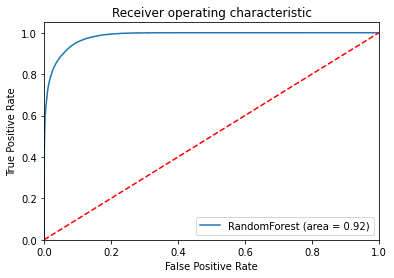

In [433]:
rf_roc_auc = roc_auc_score(y_test, y_pred_rf)
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='RandomForest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RF_ROC')
plt.show()

XGBoost Classifier

In [0]:
#xgboost
from xgboost import XGBClassifier
from xgboost import plot_importance

In [435]:
xgbc = XGBClassifier(max_depth=24,min_child_weight=1,n_estimators=500,random_state=42,learning_rate=0.2)
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=24,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
y_pred_xgbc= xgbc.predict(X_test)

In [437]:
xgbc_score_train = xgbc.score(X_train,y_train)
print("Train Prediction Score",xgbc_score_train*100)
xgbc_score_test = accuracy_score(y_test,y_pred_xgbc)
print("Test Prediction Score",xgbc_score_test*100)

Train Prediction Score 99.10799833809575
Test Prediction Score 94.91820514849694


In [438]:
y_pred_xgbc_test= xgbc.predict(test_X)
xgbc_score_test = accuracy_score(test_Y,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X1)
xgbc_score_test = accuracy_score(test_Y1,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X2)
xgbc_score_test = accuracy_score(test_Y2,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X3)
xgbc_score_test = accuracy_score(test_Y3,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X4)
xgbc_score_test = accuracy_score(test_Y4,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X5)
xgbc_score_test = accuracy_score(test_Y5,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X6)
xgbc_score_test = accuracy_score(test_Y6,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)

Test Prediction Score 88.07197049656662
Test Prediction Score 69.77125147579693
Test Prediction Score 88.42159601603304
Test Prediction Score 78.2072666618319
Test Prediction Score 78.93699006820196
Test Prediction Score 74.4636559139785
Test Prediction Score 18.095174914864444


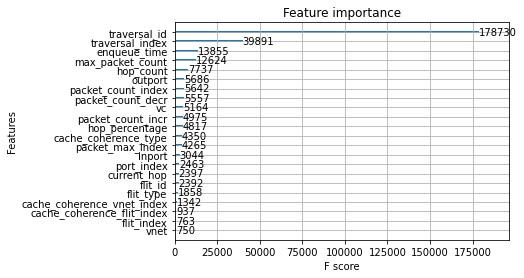

In [439]:
plot_importance(xgbc)
plt.show()

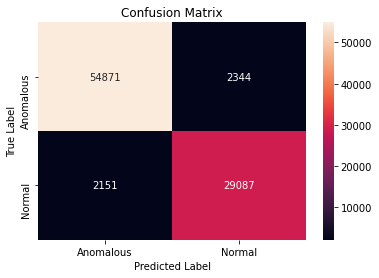

In [440]:
cm = confusion_matrix(y_test, y_pred_xgbc)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [441]:
print(classification_report(y_test,y_pred_xgbc))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96     57215
           1       0.93      0.93      0.93     31238

    accuracy                           0.95     88453
   macro avg       0.94      0.95      0.94     88453
weighted avg       0.95      0.95      0.95     88453



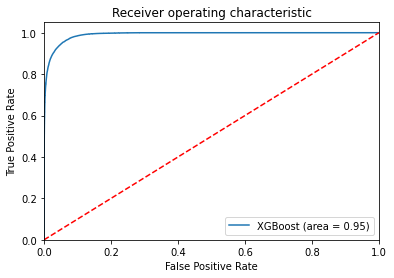

In [442]:
xgb_roc_auc = roc_auc_score(y_test, y_pred_xgbc)
fpr, tpr, thresholds = roc_curve(y_test, xgbc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('XGB_ROC')
plt.show()

LightGBM Classifier

In [0]:
#lightgbm
import lightgbm as lgb

In [444]:
gbm = lgb.LGBMClassifier(learning_rate = 0.6,  n_estimators = 500, max_depth = 24, random_state=42, min_child_weight=1,metric='binary',boosting_type = 'dart')
gbm.fit(X_train, y_train)

LGBMClassifier(boosting_type='dart', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.6, max_depth=24,
               metric='binary', min_child_samples=20, min_child_weight=1,
               min_split_gain=0.0, n_estimators=500, n_jobs=-1, num_leaves=31,
               objective=None, random_state=42, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

In [0]:
y_pred_gbm= gbm.predict(X_test)

In [446]:
gbm_score_train = gbm.score(X_train,y_train)
print("Train Prediction Score",gbm_score_train*100)
gbm_score_test = accuracy_score(y_test,y_pred_gbm)
print("Test Prediction Score",gbm_score_test*100)

Train Prediction Score 89.18886071942364
Test Prediction Score 88.33052581597006


In [447]:
y_pred_gbm_test = gbm.predict(test_X)
gbm_score_test = accuracy_score(test_Y,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X1)
gbm_score_test = accuracy_score(test_Y1,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X2)
gbm_score_test = accuracy_score(test_Y2,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X3)
gbm_score_test = accuracy_score(test_Y3,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X4)
gbm_score_test = accuracy_score(test_Y4,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X5)
gbm_score_test = accuracy_score(test_Y5,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X6)
gbm_score_test = accuracy_score(test_Y6,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)

Test Prediction Score 85.91881588913861
Test Prediction Score 65.20661157024793
Test Prediction Score 85.67199076885704
Test Prediction Score 71.6730727391399
Test Prediction Score 71.02411491216962
Test Prediction Score 70.3225806451613
Test Prediction Score 22.818539648843483


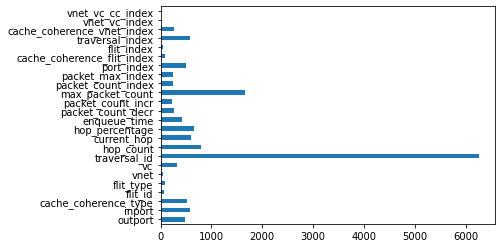

In [448]:
feat_importances = pd.Series(gbm.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

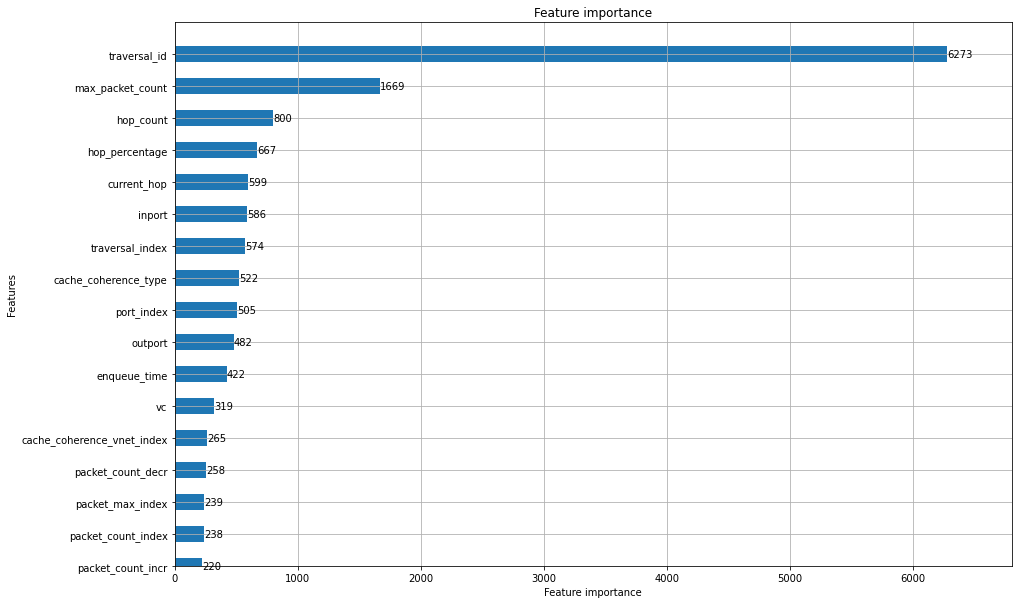

In [449]:
ax = lgb.plot_importance(gbm, height = 0.5, max_num_features = 17, xlim = (0,6800), ylim = (0,17), figsize = (15,10))
plt.show()

In [450]:
sorted(gbm.feature_importances_,reverse=True)

[6273,
 1669,
 800,
 667,
 599,
 586,
 574,
 522,
 505,
 482,
 422,
 319,
 265,
 258,
 239,
 238,
 220,
 93,
 79,
 75,
 57,
 55,
 3,
 0]

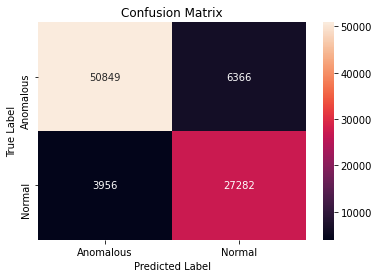

In [451]:
cm = confusion_matrix(y_test, y_pred_gbm)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [452]:
print(classification_report(y_test,y_pred_gbm))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91     57215
           1       0.81      0.87      0.84     31238

    accuracy                           0.88     88453
   macro avg       0.87      0.88      0.87     88453
weighted avg       0.89      0.88      0.88     88453



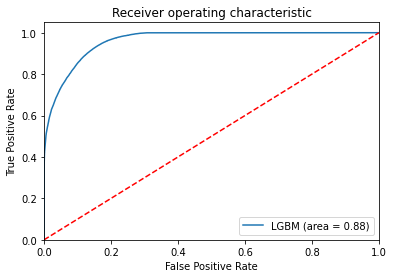

In [453]:
lgbm_roc_auc = roc_auc_score(y_test, y_pred_gbm)
fpr, tpr, thresholds = roc_curve(y_test, gbm.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='LGBM (area = %0.2f)' % lgbm_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('LGBM_ROC')
plt.show()